In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from linreg import linreg

In [8]:
background = (0 + (-.04)) / 2 # background radiation level

radiation_lvl_mV = np.array([[.28,.63,.79],[.82,1,1.08],[1.58,1.66,1.71],[2.47,2.52,2.55],[3.53,3.54,3.56],[4.74,4.73,4.72],
                    [6.07,6.02,5.98],[6.92,6.9,6.69],[7.6,7.49,7.42],[8.98,8.98,8.93]])

radiation_lvl_mV_err = np.sqrt(0.005**2 + np.std(radiation_lvl_mV, axis = 1)**2) 

radiation_lvl_mV_avg = np.mean(radiation_lvl_mV, axis=1) - background
radiation_lvl_mV_avg_err = (3*((1/3)**2)*(radiation_lvl_mV_err**2))**0.5

filament_voltage_mV = np.array([2.00,3.00,4.00,5.00,6.00,7.00,8.00,8.50,9.00,10.00]) # THESE VALUES SHOULD BE UPDATED WITH MORE PRECISE ONES SENT BY ALEX
filament_current = np.array([.81,.98,1.12,1.25,1.37,1.48,1.59,1.64,1.69,1.79]) # units of amperes
current_err = .005 # amperes
volt_err = .005 # mV

R_ref = 1.03 # units of ohm's

resistance = filament_voltage_mV / filament_current # units of milliohm's
resistance_err = ((volt_err**2 + (resistance*current_err)**2)**0.5) / filament_current # error in resistance

relative_resistance = resistance / R_ref
relative_resistance_err = ((((1 / R_ref)**2) * resistance_err**2) + ((-1/(resistance**2))**2) * .005)**0.5
# USE TABLE IN LAB MANUAL TO DETERMINE FILAMENT TEMPERATURE

### Establishing linear relationship for table in lab manual

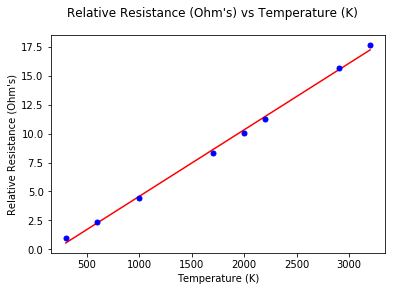

In [9]:
x = np.array([300,600,1000,1700,2000,2200,2900,3200]) # units of kelvin
y = np.array([1,2.34,4.41,8.28,10.03,11.24,15.63,17.62]) # unitless. random values chosen from the table in manual
err_y = np.ones(len(y)) * .000001

coeff = linreg(x, y, err_y, len(x) - 2, 'Temperature (K)', 'Relative Resistance (Ohm\'s)', "Relative Resistance (Ohm\'s) vs Temperature (K)")

In [12]:
def resistance_to_temperature(relative_resistivity, m = coeff[0], b = coeff[2]):
    '''takes the relative_resistance, slope, and y-intercept, and returns the filament temperature, 
    in Kelvin, corresponding to the given relative resistivity'''
    return (relative_resistivity - b) / m

In [18]:
filament_temp_K = resistance_to_temperature(relative_resistance)
filament_temp_K_err = (1 / relative_resistance) * relative_resistance_err

Text(0.5, 0.98, 'radiation level vs filament_temperature')

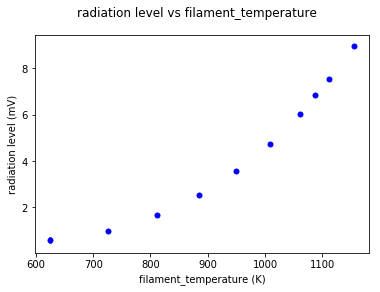

In [19]:
x = filament_temp_K
y = radiation_lvl_mV_avg
err_y = radiation_lvl_mV_avg_err # NEED TO INCLUDE ERROR IN FILAMENT TEMPERATURE (x)

plt.errorbar(x, y, yerr = err_y, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel('filament_temperature (K)')
plt.ylabel('radiation level (mV)')
plt.suptitle("radiation level vs filament_temperature")

### Fitting line to log log data

array([ 4.48940e+00,  4.46750e+00, -2.94901e+01,  3.01940e+01,
        2.80000e-03,  3.00000e-04])

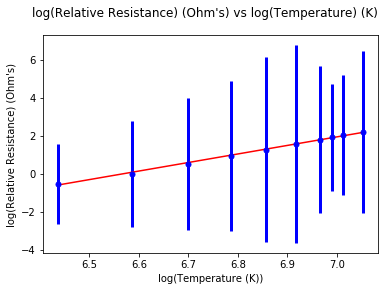

In [21]:
x = np.log(filament_temp_K)
y = np.log(radiation_lvl_mV_avg)
err_y = np.log(radiation_lvl_mV_avg_err) # NEED TO INCLUDE ERROR IN FILAMENT TEMPERATURE (x)

linreg(x, y, err_y, len(x) - 2, 'log(Temperature (K))', 'log(Relative Resistance) (Ohm\'s)', "log(Relative Resistance) (Ohm\'s) vs log(Temperature) (K)")